In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('tennis.csv')
df

,Day,Outlook,Temp,Humidity,Wind,Play tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [3]:
df=df.drop('Day ',axis=1)
df

,Outlook,Temp,Humidity,Wind,Play tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
oe_cats=[['Sunny','Overcast','Rain'],['Hot','Mild','Cool'],['Normal','High'],['Weak','Strong']]
oe_cols=['Outlook','Temp','Humidity','Wind']
oe=OrdinalEncoder(categories=oe_cats)
df[oe_cols]=oe.fit_transform(df[oe_cols])
oe.categories

[['Sunny', 'Overcast', 'Rain'],
 ['Hot', 'Mild', 'Cool'],
 ['Normal', 'High'],
 ['Weak', 'Strong']]

In [5]:
le=LabelEncoder()
df['Play tennis']=le.fit_transform(df['Play tennis'])
df

,Outlook,Temp,Humidity,Wind,Play tennis
0,0.0,0.0,1.0,0.0,0
1,0.0,0.0,1.0,1.0,0
2,1.0,0.0,1.0,0.0,1
3,2.0,1.0,1.0,0.0,1
4,2.0,2.0,0.0,0.0,1
5,2.0,2.0,0.0,1.0,0
6,1.0,2.0,0.0,1.0,1
7,0.0,1.0,1.0,0.0,0
8,0.0,2.0,0.0,0.0,1
9,2.0,1.0,0.0,0.0,1


In [6]:
x=df.iloc[:,:-1]
x

,Outlook,Temp,Humidity,Wind
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0
2,1.0,0.0,1.0,0.0
3,2.0,1.0,1.0,0.0
4,2.0,2.0,0.0,0.0
5,2.0,2.0,0.0,1.0
6,1.0,2.0,0.0,1.0
7,0.0,1.0,1.0,0.0
8,0.0,2.0,0.0,0.0
9,2.0,1.0,0.0,0.0


In [7]:
y=df.iloc[:,-1]
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play tennis, dtype: int32

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
train_pred=dtc.predict(x_train)
test_pred=dtc.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(f'Train Accuracy:{accuracy_score(train_pred,y_train)}')
print(f'Test Accuracy:{accuracy_score(test_pred,y_test)}')

Train Accuracy:1.0
Test Accuracy:0.6666666666666666


Train set:


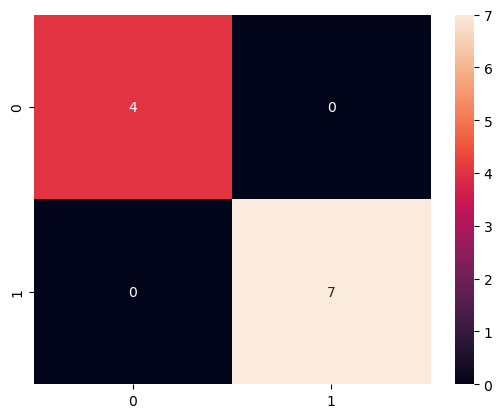

Test set:


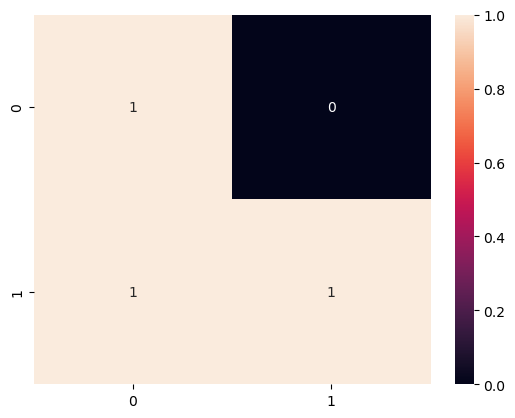

In [12]:
print('Train set:')
sns.heatmap(confusion_matrix(y_train,train_pred),annot=True)
plt.show()
print('Test set:')
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True)
plt.show()

In [14]:
from sklearn import tree
with open('TENNIS.txt','w') as f:
    f=tree.export_graphviz(dtc,out_file=f)